## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


# *Step 1*

#  Load the Datasets

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3



### 1.*Rotten Tomato Dataset* 

In [2]:


# Load  2 TSV file
movie_info= pd.read_csv('data/rt.movie_info.tsv.gz', sep='\t')
reviews=pd.read_csv('data/rt.reviews.tsv.gz', sep='\t',encoding='latin1')




## User-Defined function to give a summary

In [3]:
def explore_dataframe(df, name="DataFrame"): #user defined function to get the shape,info and description of the dataset
    print(f"\n===== {name} Overview =====")
    
    print("\nShape:")
    print(df.shape)
    
    print("\nInfo:")
    print("-" * 40)
    df.info()
    
    print("\nDescription:")
    print("-" * 40)
    print(df.describe(include='all'))


In [4]:
explore_dataframe(movie_info, name="Movie Info") #calling the function




===== Movie Info Overview =====

Shape:
(1560, 12)

Info:
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB

Description:
----------------------------------------
                 id                                           synopsis rating  \
count   1560.000

### Mirroring the same on the **RT** review dataset

In [5]:
explore_dataframe(reviews, name="Reviews") #calling the function


===== Reviews Overview =====

Shape:
(54432, 8)

Info:
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB

Description:
----------------------------------------
                  id                   review rating  fresh        critic  \
count   54432.000000                    48869  40915  54432         51710   
unique           NaN                    48682    186      2          3496   
top              NaN  Parental Content Review    3/5  fresh

In [6]:
movie_info.head() 

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [7]:
reviews.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


#### Check the percentage of missing values

In [8]:
# Calculate missing percentages
missing_percentage = (movie_info.isnull().sum() / len(movie_info)) * 100

# Display missing values sorted in descending order
print(missing_percentage.sort_values(ascending=False))

box_office      78.205128
currency        78.205128
studio          68.333333
writer          28.782051
dvd_date        23.012821
theater_date    23.012821
director        12.756410
synopsis         3.974359
runtime          1.923077
genre            0.512821
rating           0.192308
id               0.000000
dtype: float64


#### **Cleaning and rechecking of the dataset**

In [9]:


def input_missing_values(df):
    for col in df.columns:
        if df[col].isnull().sum() > 0:
            if pd.api.types.is_numeric_dtype(df[col]):
                # If numeric, fill missing values with the median
                df[col].fillna(df[col].median(), inplace=True)
            elif pd.api.types.is_object_dtype(df[col]):
                # If categorical, fill missing values with the mode
                df[col].fillna(df[col].mode()[0], inplace=True)
            elif pd.api.types.is_datetime64_any_dtype(df[col]):
                # If date column, fill missing dates with the most frequent date or median
                df[col].fillna(df[col].mode()[0], inplace=True)
                
    return df

# Assuming df is your DataFrame
movie_info_cleaned = input_missing_values(movie_info)
reviews_cleaned = input_missing_values(reviews)


# Calculate missing percentages
missing_percentage = (movie_info_cleaned.isnull().sum() / len(movie_info_cleaned)) * 100

# Display missing values sorted in descending order
print(missing_percentage.sort_values(ascending=False))


studio          0.0
runtime         0.0
box_office      0.0
currency        0.0
dvd_date        0.0
theater_date    0.0
writer          0.0
director        0.0
genre           0.0
rating          0.0
synopsis        0.0
id              0.0
dtype: float64


In [10]:
movie_info_cleaned.shape

(1560, 12)

In [11]:
# Calculate missing percentages
missing_percentage = (reviews.isnull().sum() / len(reviews)) * 100

# Display missing values sorted in descending order
print(missing_percentage.sort_values(ascending=False))

date          0.0
publisher     0.0
top_critic    0.0
critic        0.0
fresh         0.0
rating        0.0
review        0.0
id            0.0
dtype: float64


In [12]:


# Calculate missing percentages
missing_percentage = (reviews_cleaned.isnull().sum() / len(reviews_cleaned)) * 100

# Display missing values sorted in descending order
print(missing_percentage.sort_values(ascending=False))

date          0.0
publisher     0.0
top_critic    0.0
critic        0.0
fresh         0.0
rating        0.0
review        0.0
id            0.0
dtype: float64


In [13]:
reviews_cleaned.shape

(54432, 8)

In [14]:
# Merge the two DataFrames on the 'id' column
merged_df = pd.merge(reviews_cleaned, movie_info_cleaned, on='id', how='inner')

# Optionally, you can print or explore the merged DataFrame
print(merged_df.head())


   id                                             review rating_x   fresh  \
0   3  A distinctly gallows take on contemporary fina...      3/5   fresh   
1   3  It's an allegory in search of a meaning that n...      3/5  rotten   
2   3  ... life lived in a bubble in financial dealin...      3/5   fresh   
3   3  Continuing along a line introduced in last yea...      3/5   fresh   
4   3             ... a perverse twist on neorealism...       3/5   fresh   

           critic  top_critic         publisher               date  \
0      PJ Nabarro           0   Patrick Nabarro  November 10, 2018   
1  Annalee Newitz           0           io9.com       May 23, 2018   
2    Sean Axmaker           0  Stream on Demand    January 4, 2018   
3   Daniel Kasman           0              MUBI  November 16, 2017   
4    Emanuel Levy           0      Cinema Scope   October 12, 2017   

                                            synopsis rating_y  \
0  New York City, not-too-distant-future: Eric Pa..

In [15]:
# Check for duplicate rows
duplicates = merged_df.duplicated()

# How many duplicates?
print(f"Number of duplicate rows: {duplicates.sum()}")

# Optionally, show the duplicate rows
if duplicates.sum() > 0:
    display(merged_df[duplicates])
else:
    print("No duplicate rows found.")

# Now actually remove duplicate rows
merged_df.drop_duplicates(inplace=True)



Number of duplicate rows: 9


,id,review,rating_x,fresh,critic,top_critic,publisher,date,synopsis,rating_y,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
8129,304,"Friends With Kids is a smart, witty and potty-...",3/5,fresh,Emanuel Levy,0,Liverpool Echo,"June 29, 2012",Friends with Kids is a daring and poignant ens...,R,Comedy|Drama,Jennifer Westfeldt,Jennifer Westfeldt,"Mar 9, 2012","Jul 17, 2012",$,"5,600,000",107 minutes,Roadside Attractions
14575,581,Parental Content Review,4.5/5,fresh,Emanuel Levy,0,Film Threat,"December 6, 2005",David Wagner is a Nineties kid with a Fifties ...,PG-13,Comedy|Drama|Science Fiction and Fantasy,Gary Ross,Gary Ross,"Oct 23, 1998","Mar 23, 1999",$,"20,900,803",125 minutes,New Line Cinema
26226,1055,Parental Content Review,4/5,fresh,Emanuel Levy,0,Film Threat,"December 6, 2005",The grim futility of the war between Bosnia an...,R,Art House and International|Drama,Danis Tanovic,Danis Tanovic,"Dec 21, 2001","Apr 9, 2002",$,"948,054",98 minutes,United Artists Pictures
35162,1368,Parental Content Review,2/5,rotten,Emanuel Levy,0,Film Threat,"December 6, 2005","In this drama, two U.S. Marines who stood side...",R,Action and Adventure|Drama|Mystery and Suspense,William Friedkin,Stephen Gaghan,"Apr 7, 2000","Oct 10, 2000",$,"20,900,803",127 minutes,Paramount Pictures
35166,1368,Parental Content Review,2/5,rotten,Emanuel Levy,0,Film Threat,"December 8, 2002","In this drama, two U.S. Marines who stood side...",R,Action and Adventure|Drama|Mystery and Suspense,William Friedkin,Stephen Gaghan,"Apr 7, 2000","Oct 10, 2000",$,"20,900,803",127 minutes,Paramount Pictures
40567,1535,Parental Content Review,2/5,rotten,Emanuel Levy,0,Film Threat,"December 6, 2005",Vin Diesel opted to not appear in the sequel t...,PG-13,Action and Adventure|Drama|Mystery and Suspense,John Singleton,Gary Scott Thompson|Derek Haas|Michael Brandt,"Jun 6, 2003","Sep 30, 2003",$,"127,083,765",108 minutes,Universal Pictures Distributio
42381,1598,"This tired, neutered action thriller won't cau...",2/5,rotten,Emanuel Levy,0,Empire Magazine,"November 14, 2008",Max Payne is a maverick cop - a mythic anti-he...,PG-13,Action and Adventure|Drama|Mystery and Suspense,Steven Spielberg,Beau Thorne,"Oct 17, 2008","Jan 20, 2009",$,"40,632,110",100 minutes,20th Century Fox
49487,1843,Parental Content Review,0.5/5,rotten,Emanuel Levy,0,Film Threat,"December 6, 2005",Madonna and Rupert Everett star in this comic ...,PG-13,Art House and International|Comedy|Drama,John Schlesinger,Tom Ropelewski,"Mar 3, 2000","May 2, 2005",$,"20,900,803",108 minutes,Paramount Home Video
49492,1843,Parental Content Review,0.5/5,rotten,Emanuel Levy,0,Film Threat,"December 8, 2002",Madonna and Rupert Everett star in this comic ...,PG-13,Art House and International|Comedy|Drama,John Schlesinger,Tom Ropelewski,"Mar 3, 2000","May 2, 2005",$,"20,900,803",108 minutes,Paramount Home Video


In [16]:
merged_df.columns

Index(['id', 'review', 'rating_x', 'fresh', 'critic', 'top_critic',
       'publisher', 'date', 'synopsis', 'rating_y', 'genre', 'director',
       'writer', 'theater_date', 'dvd_date', 'currency', 'box_office',
       'runtime', 'studio'],
      dtype='object')

## 2. *Box office Dataset*

In [17]:
box_office = pd.read_csv('data/bom.movie_gross.csv.gz', delimiter=',')


In [18]:
def explore_dataframe(df, name="DataFrame"):
    print(f"\n===== {name} Overview =====")
    
    print("\nShape:")
    print(df.shape)
    
    print("\nInfo:")
    print("-" * 40)
    df.info()
    
    print("\nDescription:")
    print("-" * 40)
    print(df.describe(include='all'))

In [19]:
explore_dataframe(box_office, name="Box Office")


===== Box Office Overview =====

Shape:
(3387, 5)

Info:
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB

Description:
----------------------------------------
            title studio  domestic_gross foreign_gross         year
count        3387   3382    3.359000e+03          2037  3387.000000
unique       3386    257             NaN          1204          NaN
top     Bluebeard    IFC             NaN       1200000          NaN
freq            2    166             NaN            23          NaN
mean          NaN    

In [20]:
box_office.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [21]:
# Calculate missing percentages
missing_percentage = (box_office.isnull().sum() / len(box_office)) * 100

# Display missing values sorted in descending order
print(missing_percentage.sort_values(ascending=False))

foreign_gross     39.858282
domestic_gross     0.826690
studio             0.147623
year               0.000000
title              0.000000
dtype: float64


In [22]:
def input_missing_values(df):
    for col in df.columns:
        if df[col].isnull().sum() > 0:
            if pd.api.types.is_numeric_dtype(df[col]):
                # If numeric, fill missing values with the median
                df[col].fillna(df[col].median(), inplace=True)
            elif pd.api.types.is_object_dtype(df[col]):
                # If categorical, fill missing values with the mode
                df[col].fillna(df[col].mode()[0], inplace=True)
            elif pd.api.types.is_datetime64_any_dtype(df[col]):
                # If date column, fill missing dates with the most frequent date or median
                df[col].fillna(df[col].mode()[0], inplace=True)
                
    return df
box_office_cleaned=input_missing_values(box_office)

# Calculate missing percentages
missing_percentage = (box_office_cleaned.isnull().sum() / len(box_office_cleaned)) * 100

# Display missing values sorted in descending order
print(missing_percentage.sort_values(ascending=False))

year              0.0
foreign_gross     0.0
domestic_gross    0.0
studio            0.0
title             0.0
dtype: float64


In [23]:
# Check for duplicate rows
duplicates = box_office_cleaned.duplicated()

# How many duplicates?
print(f"Number of duplicate rows: {duplicates.sum()}")

# Optionally, show the duplicate rows
if duplicates.sum() > 0:
    display(box_office_cleaned[duplicates])
else:
    print("No duplicate rows found.")


Number of duplicate rows: 0
No duplicate rows found.


In [24]:
box_office_cleaned.columns

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')

## The IMDB Dataset

In [25]:
import zipfile
with zipfile.ZipFile('data/im.db.zip', 'r') as zip_ref:
    zip_ref.extractall('extracted/')

import sqlite3
conn = sqlite3.connect('extracted/im.db')



In [26]:
cursor = conn.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()
print(tables)


[('movie_basics',), ('directors',), ('known_for',), ('movie_akas',), ('movie_ratings',), ('persons',), ('principals',), ('writers',)]


# user defined function that loops through the tables to check for null values

In [27]:

# user defined function that loops through the tables to check for null values
def check_nulls_in_all_tables(db_path):
    conn = sqlite3.connect(db_path)
    cursor = conn.cursor()

    # Get all table names
    cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
    tables = [row[0] for row in cursor.fetchall()]

    for table in tables:
        print(f"\n===== Missing Values in {table} =====")
        df = pd.read_sql(f"SELECT * FROM {table}", conn)
        nulls = df.isnull().mean() * 100
        print(nulls[nulls > 0].sort_values(ascending=False))  # only print columns with missing data

    conn.close()


In [28]:
check_nulls_in_all_tables('extracted/im.db')



===== Missing Values in movie_basics =====
runtime_minutes    21.717621
genres              3.700460
original_title      0.014369
dtype: float64

===== Missing Values in directors =====
Series([], dtype: float64)

===== Missing Values in known_for =====
Series([], dtype: float64)

===== Missing Values in movie_akas =====
attributes           95.500493
language             87.423991
types                49.217523
region               16.066481
is_original_title     0.007537
dtype: float64

===== Missing Values in movie_ratings =====
Series([], dtype: float64)

===== Missing Values in persons =====
death_year            98.881889
birth_year            86.361778
primary_profession     8.462898
dtype: float64

===== Missing Values in principals =====
job           82.718691
characters    61.742331
dtype: float64

===== Missing Values in writers =====
Series([], dtype: float64)


## **Using a user -defined function for cleaning of the SQL dataset**

In [29]:
import sqlite3  # Import the SQLite3 module for database operations
import pandas as pd  # Import pandas for data manipulation

def clean_db_with_fill_strategy(db_path):
    # Connect to the SQLite database using the provided path
    conn = sqlite3.connect(db_path)
    cursor = conn.cursor()  # Create a cursor object to interact with the database

    # Execute SQL query to get all table names in the database
    cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
    tables = cursor.fetchall()  # Fetch the table names from the query result

    # Loop through each table in the database
    for (table,) in tables:
        # Read the entire table into a pandas DataFrame
        df = pd.read_sql(f"SELECT * FROM {table}", conn)
        
        # Calculate the number of missing (null) values in each column
        nulls = df.isnull().sum()
        
        # If there are no missing values in the table, skip to the next table
        if nulls.sum() == 0:
            continue  # Skip if no nulls in the table

        print(f"\nCleaning '{table}'...")  # Print the current table name being cleaned

        # Loop through each column in the DataFrame
        for col in df.columns:
            # Check if the column has any missing values
            if df[col].isnull().sum() > 0:
                # If the column is numeric, fill missing values with the median
                if pd.api.types.is_numeric_dtype(df[col]):
                    df[col].fillna(df[col].median(), inplace=True)
                else:
                    # If the column is categorical, fill missing values with the mode (most frequent value)
                    if not df[col].mode().empty:
                        df[col].fillna(df[col].mode()[0], inplace=True)

        # Drop duplicate rows from the DataFrame
        df.drop_duplicates(inplace=True)
        print(f"Duplicates dropped in '{table}'.")  # Print a message indicating duplicates were removed

        # Print the number of remaining null values in each column after cleaning
        print(f"Nulls remaining in '{table}':\n{df.isnull().sum()}")
        
        # Optional: Save the cleaned DataFrame back into the database, replacing the old table
        # df.to_sql(table, conn, if_exists="replace", index=False)

    # Close the connection to the database
    # conn.close()


In [30]:
clean_db_with_fill_strategy('extracted/im.db')


Cleaning 'movie_basics'...
Duplicates dropped in 'movie_basics'.
Nulls remaining in 'movie_basics':
movie_id           0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
dtype: int64

Cleaning 'movie_akas'...
Duplicates dropped in 'movie_akas'.
Nulls remaining in 'movie_akas':
movie_id             0
ordering             0
title                0
region               0
language             0
types                0
attributes           0
is_original_title    0
dtype: int64

Cleaning 'persons'...
Duplicates dropped in 'persons'.
Nulls remaining in 'persons':
person_id             0
primary_name          0
birth_year            0
death_year            0
primary_profession    0
dtype: int64

Cleaning 'principals'...
Duplicates dropped in 'principals'.
Nulls remaining in 'principals':
movie_id      0
ordering      0
person_id     0
category      0
job           0
characters    0
dtype: int64


> # Combined Visuals and Analysis

>> ## Studios vs Box Office



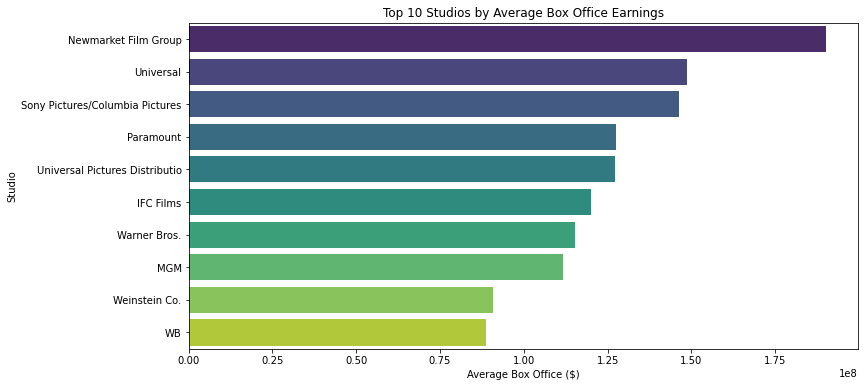

In [31]:
# Remove commas and convert to numeric
merged_df['box_office'] = merged_df['box_office'].replace(',', '', regex=True)
merged_df['box_office'] = pd.to_numeric(merged_df['box_office'], errors='coerce')
# Group by studio and calculate mean
studio_box_office = merged_df.groupby('studio')['box_office'].mean().dropna().sort_values(ascending=False)

# Top 10 Studios
top_10_studios = studio_box_office.head(10)

# Plot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.barplot(x=top_10_studios.values, y=top_10_studios.index, palette="viridis")
plt.title('Top 10 Studios by Average Box Office Earnings')
plt.xlabel('Average Box Office ($)')
plt.ylabel('Studio')
plt.show()



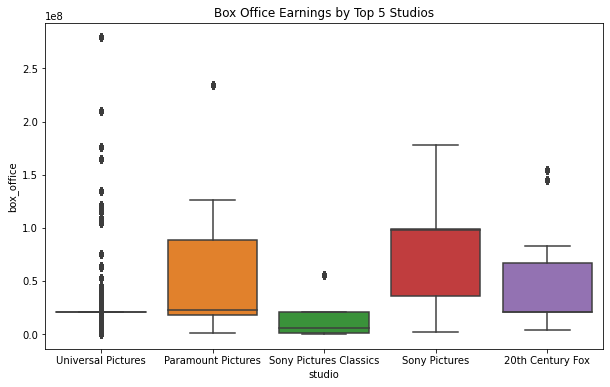

In [32]:
# Find top 5 studios by number of movies
top_studios = merged_df['studio'].value_counts().head(5).index

# Filter dataframe
filtered_df = merged_df[merged_df['studio'].isin(top_studios)]

# Now make the boxplot again
plt.figure(figsize=(10, 6))
sns.boxplot(data=filtered_df, x='studio', y='box_office')
plt.title('Box Office Earnings by Top 5 Studios')
plt.show()



In [33]:
from scipy.stats import f_oneway

# Prepare data for ANOVA
groups = [group['box_office'].values for name, group in merged_df.groupby('studio')]

# Run the ANOVA test
f_stat, p_value = f_oneway(*groups)

# Print results
print(f"F-statistic: {f_stat}")
print(f"P-value: {p_value}")


F-statistic: 136.53379349295736
P-value: 0.0


The p-value tests the null hypothesis: "All group means are equal."

A p-value close to 0 (technically here it is something like <0.0001) means:

You reject the null hypothesis.

There are statistically significant differences between at least two of the groups.

There is strong evidence to suggest that at least one studio has a significantly different mean box office earnings compared to the others. The results of the ANOVA test confirm that the differences in the average earnings across studios are statistically significant.

#### Box office dataset visual

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate total gross
box_office_cleaned['domestic_gross'] = pd.to_numeric(box_office_cleaned['domestic_gross'], errors='coerce') 
# Group by studio
studio_gross = box_office_cleaned.groupby('studio')['total_gross'].sum().sort_values(ascending=False).head(5)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=studio_gross.values, y=studio_gross.index, palette='rocket')
plt.title('Top 10 Studios by Total Gross Revenue', fontsize=16)
plt.xlabel('domestic Gross ($)')
plt.ylabel('Studio')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

KeyError: 'Column not found: total_gross'

Null Hypothesis: There is no difference in the medians of domestic gross earnings across studios.

Alternative Hypothesis: There is a difference in the medians of domestic gross earnings across studios.

In [36]:
from scipy.stats import f_oneway

# Prepare data for ANOVA (grouped by studio)
groups = [group['domestic_gross'].values for name, group in box_office_cleaned.groupby('studio')]

# Perform the One-Way ANOVA
f_stat, p_value = f_oneway(*groups)

# Print the result
print(f"F-statistic: {f_stat}")
print(f"P-value: {p_value}")


F-statistic: 8.116138932230557
P-value: 5.873600079513122e-203


There is a statistically significant difference in the mean domestic gross earnings between the studios.

At least one studio has a different average domestic gross compared to the others.



>>> ## Top Directors vs Box Office

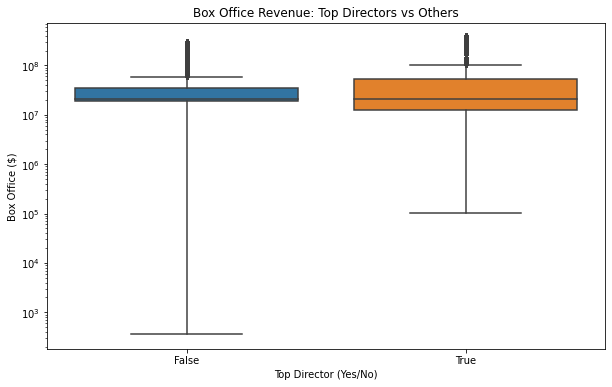

T-statistic: 26.0987, P-value: 0.0000


In [37]:
# --- 1. Connect to your database ---
import sqlite3
import pandas as pd

# Connect (adjust path if needed)
conn = sqlite3.connect('extracted/im.db')  # or your actual db

# --- 2. SQL Queries ---

# 2.1 Directors and their movies
query_directors = """
SELECT d.movie_id, p.primary_name AS director_name
FROM directors AS d
JOIN persons AS p
ON d.person_id = p.person_id;
"""
directors_df = pd.read_sql_query(query_directors, conn)

# 2.2 Movies and their average ratings
query_ratings = """
SELECT movie_id, averagerating
FROM movie_ratings;
"""
ratings_df = pd.read_sql_query(query_ratings, conn)

# --- 3. Merge Directors with Ratings ---
directors_with_ratings = pd.merge(directors_df, ratings_df, on='movie_id')

# --- 4. Calculate average rating per director ---
director_avg_rating = directors_with_ratings.groupby('director_name')['averagerating'].mean()

# --- 5. Define "top directors" (avg rating >= 7.0) ---
top_directors = director_avg_rating[director_avg_rating >= 7.0].index.tolist()

# --- 6. Mark in merged_df whether movie is by a top director ---
merged_df['is_top_director'] = merged_df['director'].isin(top_directors)

# --- 7. Convert 'box_office' to numeric (if not done already) ---
merged_df['box_office'] = (
    merged_df['box_office']
    .replace('[\$,]', '', regex=True)  # remove $ and commas
    .astype(float)
)

# --- 8. Drop NaN values in 'box_office' before visualization ---
filtered_df = merged_df.dropna(subset=['box_office'])

# --- 9. Visualization ---

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.boxplot(data=filtered_df, x='is_top_director', y='box_office')
plt.title('Box Office Revenue: Top Directors vs Others')
plt.xlabel('Top Director (Yes/No)')
plt.ylabel('Box Office ($)')
plt.yscale('log')  # optional: log scale for better boxplot view
plt.show()

# --- 10. Statistical test (T-test) ---
from scipy import stats

# Split into two groups
top_director_revenue = filtered_df[filtered_df['is_top_director']]['box_office']
other_director_revenue = filtered_df[~filtered_df['is_top_director']]['box_office']

# Perform t-test
t_stat, p_val = stats.ttest_ind(top_director_revenue, other_director_revenue, equal_var=False)
print(f"T-statistic: {t_stat:.4f}, P-value: {p_val:.4f}")


The null hypothesis for this test was that the mean box office revenue for movies by top directors is the same as that of movies by non-top directors.

Since the p-value is essentially 0, we can confidently conclude that the box office earnings for movies directed by top directors are significantly higher than those directed by others.

In [38]:
sql_query = """SELECT 
    p.primary_name AS writer_name,
    AVG(mr.averagerating) AS avg_rating
FROM 
    writers w
JOIN 
    persons p 
ON 
    w.person_id = p.person_id
JOIN 
    movie_ratings mr 
ON 
    w.movie_id = mr.movie_id
GROUP BY 
    p.primary_name
HAVING 
    COUNT(w.movie_id) > 2
ORDER BY 
    avg_rating DESC
LIMIT 10; """
length_rating_df = pd.read_sql(sql_query, conn)


In [39]:
runtime_query = """
SELECT 
    mb.runtime_minutes,
    mr.averagerating
FROM 
    movie_basics mb
JOIN 
    movie_ratings mr 
ON 
    mb.movie_id = mr.movie_id
WHERE 
    mb.runtime_minutes IS NOT NULL
    AND mb.runtime_minutes != '\\N'
    AND mr.averagerating IS NOT NULL
"""
runtime_df = pd.read_sql(runtime_query, conn)

In [40]:
directors_query = """
SELECT 
    p.primary_name AS director_name,
    AVG(mr.averagerating) AS avg_rating
FROM 
    directors d
JOIN 
    persons p 
ON 
    d.person_id = p.person_id
JOIN 
    movie_ratings mr 
ON 
    d.movie_id = mr.movie_id
GROUP BY 
    p.primary_name
HAVING 
    COUNT(d.movie_id) > 2
ORDER BY 
    avg_rating DESC
LIMIT 10;
"""
# Run query
directors_df = pd.read_sql(directors_query, conn)

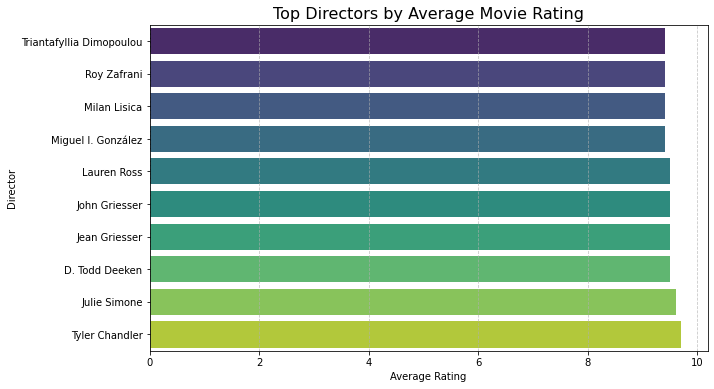

In [41]:

directors_df = directors_df.sort_values('avg_rating', ascending=True)  # Horizontal bar chart

plt.figure(figsize=(10, 6))
sns.barplot(data=directors_df, x='avg_rating', y='director_name', palette='viridis')
plt.title('Top Directors by Average Movie Rating', fontsize=16)
plt.xlabel('Average Rating')
plt.ylabel('Director')
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.show()

>>>> ## Genre vs Box Office

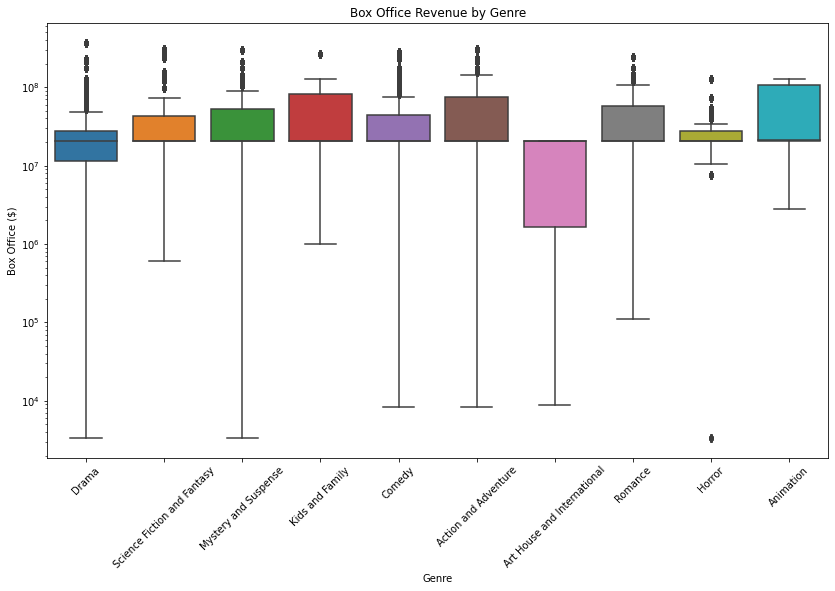

ANOVA F-statistic: 651.8414, P-value: 0.0000


In [42]:
# --- 1. Genre and Box Office Analysis ---

# Handle missing or invalid box office
merged_df['box_office'] = (
    merged_df['box_office']
    .replace('[\$,]', '', regex=True)
    .astype(float)
)

# Drop missing box office and genre rows
genre_df = merged_df.dropna(subset=['box_office', 'genre']).copy()

# --- 2. Handling multiple genres ---
# Many movies have multiple genres separated by '|'
# We'll explode them so each genre has its own row

genre_df['genre'] = genre_df['genre'].str.split('|')
genre_df = genre_df.explode('genre')

# --- 3. Visualization ---

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14,8))
top_genres = genre_df['genre'].value_counts().nlargest(10).index  # top 10 genres
sns.boxplot(data=genre_df[genre_df['genre'].isin(top_genres)], x='genre', y='box_office')
plt.xticks(rotation=45)
plt.yscale('log')  # optional: to handle extreme box office values
plt.title('Box Office Revenue by Genre')
plt.xlabel('Genre')
plt.ylabel('Box Office ($)')
plt.show()

# --- 4. Statistical Test (ANOVA) ---

from scipy import stats

# Prepare data for ANOVA
anova_data = [genre_df[genre_df['genre'] == genre]['box_office'] for genre in top_genres]

# Perform one-way ANOVA
f_stat, p_val = stats.f_oneway(*anova_data)
print(f"ANOVA F-statistic: {f_stat:.4f}, P-value: {p_val:.4f}")


There is strong evidence that the mean box office earnings differ significantly across genres. In simpler terms, some genres tend to perform much better than others at the box office.

This result is statistically significant, with a very low p-value indicating that the observed differences are unlikely to have occurred by chance.

In [43]:
# Median box office revenue per genre
genre_medians = genre_df.groupby('genre')['box_office'].median().sort_values(ascending=False)

print(genre_medians.head(10))  # Top 10 genres by median box office


genre
Television                     37442180.0
Animation                      21379315.0
Western                        20900803.0
Anime and Manga                20900803.0
Art House and International    20900803.0
Classics                       20900803.0
Comedy                         20900803.0
Cult Movies                    20900803.0
Drama                          20900803.0
Gay and Lesbian                20900803.0
Name: box_office, dtype: float64


## GENRE VS RELEASE DATE

#### We looked into the release date and if it has any effect to the performance of the specific genre.
#### We used The MovieDB database to achieve this

In [44]:
#transform the previously created genre median top 10 into a list
top_10_genres = genre_medians.head(10).index.tolist()

In [45]:
#read the csv file
df3 = pd.read_csv(
    "data/tmdb.movies.csv.gz",
     index_col=0,
    compression="gzip", 
    )

# get the genre info from the website and create a mapping dictionary to be able to name the specific IDs
df3_genre_mapping= {
    28: "Action",
    12: "Adventure",
    16: "Animation",
    35: "Comedy",
    80: "Crime",
    99: "Documentary",
    18: "Drama",
    10751: "Family",
    14: "Fantasy",
    36: "History",
    27: "Horror",
    10402: "Music",
    9648: "Mystery",
    10749: "Romance",
    878: "Science Fiction",
    10770: "TV Movie",
    53: "Thriller",
    10752: "War",
    37: "Western"
}
#The genre_ids column seems like INT format but the data is saved as a str thus we need to change the type to be able to use it 

import ast  # important for parsing the string safely

# Fix the genre_id column first because right now it's a string
df3['genre_ids'] = df3['genre_ids'].apply(ast.literal_eval)

# Define the mapping function
def map_genres(genre_id_list):
    return [df3_genre_mapping.get(int(genre_id), "Unknown") for genre_id in genre_id_list]

# Apply the mapping function
df3['genre_names'] = df3['genre_ids'].apply(map_genres)

print(df3[['genre_ids', 'genre_names']].head())

#the genre_names is in list format due to multiple genres so we explode these columns to get individual genres
df_exploded = df3.explode('genre_ids')
df_exploded = df_exploded.explode('genre_names')
df_exploded.head()

             genre_ids                              genre_names
0      [12, 14, 10751]             [Adventure, Fantasy, Family]
1  [14, 12, 16, 10751]  [Fantasy, Adventure, Animation, Family]
2        [12, 28, 878]     [Adventure, Action, Science Fiction]
3      [16, 35, 10751]              [Animation, Comedy, Family]
4        [28, 878, 12]     [Action, Science Fiction, Adventure]


,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,genre_names
0,12,12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,Adventure
0,12,12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,Fantasy
0,12,12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,Family
0,14,12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,Adventure
0,14,12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,Fantasy


In [46]:
#create a new list that looks at the different genres from both lists
top_movies_df3 = df_exploded[df_exploded['genre_names'].isin(top_10_genres)].copy()


In [47]:
#change the release date to date time format and extract the month which is what we are analysing
top_movies_df3['release_date'] = pd.to_datetime(top_movies_df3['release_date'], errors='coerce')
top_movies_df3['release_month'] = top_movies_df3['release_date'].dt.month_name()

In [48]:
#Create a common month to see the mode of the month release date for the genres
common_month_per_genre = top_movies_df3.groupby('genre_names')['release_month'].agg(lambda x: x.mode()[0])
print(common_month_per_genre)

genre_names
Animation    December
Comedy        January
Drama         October
Western          June
Name: release_month, dtype: object


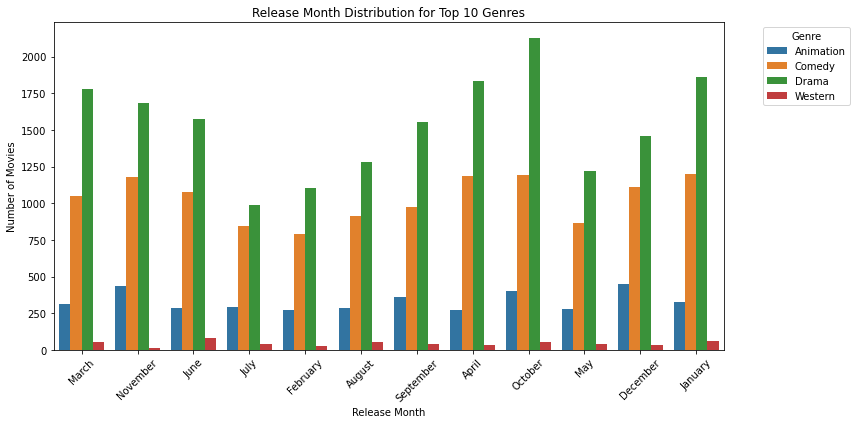

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot
plt.figure(figsize=(12,6))
sns.countplot(data=top_movies_df3, x='release_month', hue='genre_names')
plt.title('Release Month Distribution for Top 10 Genres')
plt.xlabel('Release Month')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Now we perform Hypothesis Testing Here:
We are going to test whether the month a movie is released is related to its genre — in the Top 10 genres.

1. Null Hypothesis (H₀):
There is no relationship between movie genre and release month.
(Genre and release month are independent.)

2. Alternative Hypothesis (H₁):
There is a relationship between movie genre and release month.
(Genre and release month are dependent.)

Basically we are testing whether the pattern of release months is different depending on the genre.

We are going to use a Chi-Square Test of Independence
(because both variables are categorical — genre and month.)

In [51]:
# 1. Create contingency table
contingency_table = pd.crosstab(top_movies_df3['genre_names'], top_movies_df3['release_month'])

# 2. Chi-square test
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-square Statistic: {chi2:.2f}")
print(f"P-value: {p:.4f}")

# 3. Conclusion
if p < 0.05:
    print("Reject the null hypothesis: Release month and genre are dependent.")
else:
    print("Fail to reject the null hypothesis: No strong evidence that release month and genre are related.")


Chi-square Statistic: 267.66
P-value: 0.0000
Reject the null hypothesis: Release month and genre are dependent.
